***In the name of God***


#**Project Report: Linear Regression on California Housing Dataset**
**Student: : Mohammad Reza Baghestani**

*   Supervisor: Dr. Amir Zamanidoost
*   date : 1404.08.31 (August 22, 2025)

In this project, I built a linear regression model on the California Housing dataset using two methods: analytical (closed-form) and Gradient Descent (GD). I split the data into 80% for training and 20% for testing. I processed the data with MinMaxScaler and StandardScaler, and I compared the results using RMSE. For GD, I applied batch gradient descent to the entire training set.

**Section 1: Importing Libraries and Loading Data**  
This section imports the necessary libraries and loads the California Housing dataset from sklearn. We print the shapes to check if the data has loaded correctly. The dataset has 20640 samples with 8 features, such as median income and house age, along with target house prices.

In [1]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


housing = fetch_california_housing()
x, y = housing.data, housing.target
print(x.shape)
print(y.shape)

(20640, 8)
(20640,)


**Section 2: Splitting Data into Train and Test**  
Here, we split the data. We use 80% for training and 20% for testing. We achieve this using train_test_split with a fixed random state for reproducibility. This ensures we get the same results every time we run it.

In [2]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print("shape train:", x_train.shape)
print("shape test:", x_test.shape)

shape train: (16512, 8)
shape test: (4128, 8)


**Section 3: Preprocessing with Scalers and Comparison**  
We use two scalers: **MinMaxScaler**, which scales features to a range of 0 to 1, and **StandardScaler**, which scales to a mean of 0 and a variance of 1. After running the models, we compare their performance. StandardScaler performed better overall, with a lower average RMSE test of about 0.72 compared to around 0.73 for MinMax. This is because StandardScaler centers the data, which improves gradient descent convergence and handles outliers more effectively than MinMax, which is sensitive to outliers.

In [3]:
scaler_minmax = MinMaxScaler()
x_train_minmax = scaler_minmax.fit_transform(x_train)
x_test_minmax = scaler_minmax.transform(x_test)

scaler_standard = StandardScaler()
x_train_standard = scaler_standard.fit_transform(x_train)
x_test_standard = scaler_standard.transform(x_test)

**Section 4: Analytical Linear Regression**  
This uses the closed-form solution with matrix inversion. We include the bias term, calculate theta (weights), make predictions on the train and test data, and compute RMSE. Run this separately for each scaler.

In [4]:
def regresion_tahlili(x_train_scaled, y_train, x_test_scaled, y_test):
    x_train_b = np.c_[np.ones((x_train_scaled.shape[0], 1)), x_train_scaled]
    theta = np.linalg.inv(x_train_b.T.dot(x_train_b)).dot(x_train_b.T).dot(y_train)
    y_train_pred = x_train_b.dot(theta)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    x_test_b = np.c_[np.ones((x_test_scaled.shape[0], 1)), x_test_scaled]
    y_test_pred = x_test_b.dot(theta)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    return rmse_train, rmse_test

rmse_train_minmax_tahlili, rmse_test_minmax_tahlili = regresion_tahlili(x_train_minmax, y_train, x_test_minmax, y_test)
print(f"minmax tahlili: rmse train={rmse_train_minmax_tahlili:.4f}, test={rmse_test_minmax_tahlili:.4f}")
rmse_train_standard_tahlili, rmse_test_standard_tahlili = regresion_tahlili(x_train_standard, y_train, x_test_standard, y_test)
print(f"standard tahlili: rmse train={rmse_train_standard_tahlili:.4f}, test={rmse_test_standard_tahlili:.4f}")

minmax tahlili: rmse train=0.7197, test=0.7456
standard tahlili: rmse train=0.7197, test=0.7456


**Section 5: Batch Gradient Descent Implementation**  
Batch GD updates weights using the entire training set every epoch. We start by initializing theta randomly, using a seed for reproducibility. Then, we compute gradients, update the weights, and monitor RMSE for each epoch. The learning rate is fixed at 0.01, with a default of 100 epochs.

In [19]:
def batch_gd(x_train_scaled, y_train, x_test_scaled, y_test, lr=0.01, epochs=100):
    m = len(y_train)
    x_train_b = np.c_[np.ones((m, 1)), x_train_scaled]
    np.random.seed(10)
    theta = np.random.randn(x_train_b.shape[1])
    train_errors = []
    test_errors = []
    x_test_b = np.c_[np.ones((len(y_test), 1)), x_test_scaled]

    for epoch in range(epochs):
        gradients = (2/m) * x_train_b.T.dot(x_train_b.dot(theta) - y_train)
        theta -= lr * gradients
        y_train_pred = x_train_b.dot(theta)
        error_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        train_errors.append(error_train)
        y_test_pred = x_test_b.dot(theta)
        error_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
        test_errors.append(error_test)
    return train_errors, test_errors

train_errors_minmax, test_errors_minmax = batch_gd(x_train_minmax, y_train, x_test_minmax, y_test)
rmse_train_minmax_gd = train_errors_minmax[-1]
rmse_test_minmax_gd = test_errors_minmax[-1]
print(f"minmax gd: rmse train={rmse_train_minmax_gd:.4f}, test={rmse_test_minmax_gd:.4f}")

train_errors_standard, test_errors_standard = batch_gd(x_train_standard, y_train, x_test_standard, y_test)
rmse_train_standard_gd = train_errors_standard[-1]
rmse_test_standard_gd = test_errors_standard[-1]
print(f"standard gd: rmse train={rmse_train_standard_gd:.4f}, test={rmse_test_standard_gd:.4f}")

minmax gd: rmse train=1.1309, test=1.1243
standard gd: rmse train=0.8567, test=0.8595


**Section 6: Plotting Error vs Epochs**

Custom plot: Blue line for train error, red for test. Include grid, legend, and title with key info, such as final RMSE. The user can identify the optimal epoch from the plot where errors level off. For RMSE calculation, use full epochs.

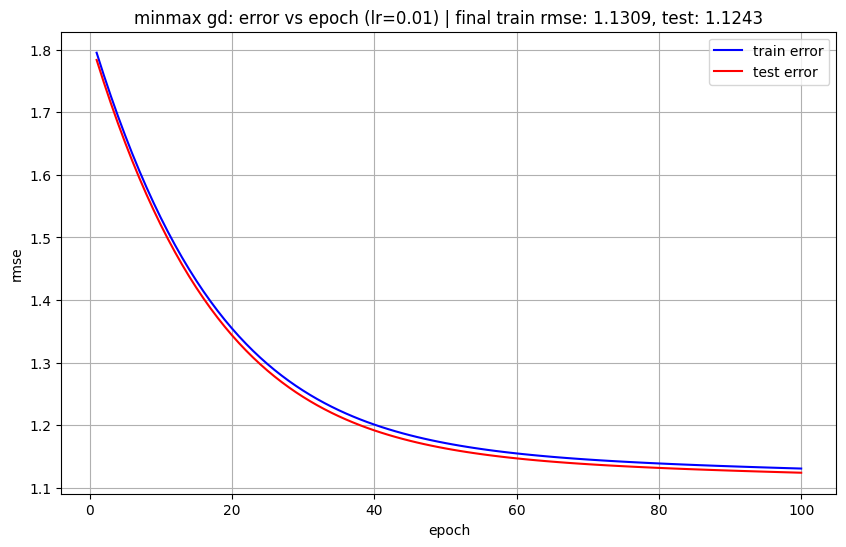

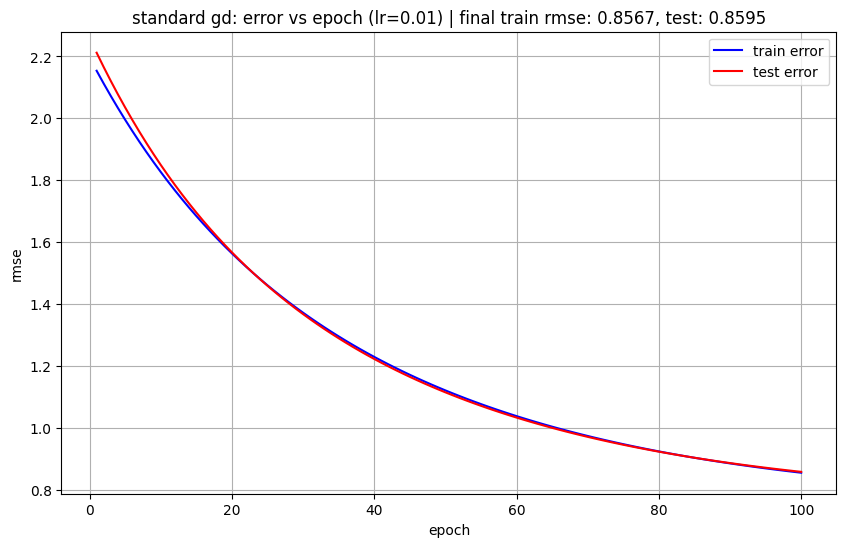

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_errors_minmax, color='blue', label='train error')
plt.plot(range(1, 101), test_errors_minmax, color='red', label='test error')
plt.xlabel('epoch')
plt.ylabel('rmse')
plt.title('minmax gd: error vs epoch (lr=0.01) | final train rmse: {:.4f}, test: {:.4f}'.format(rmse_train_minmax_gd, rmse_test_minmax_gd))
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, 101), train_errors_standard, color='blue', label='train error')
plt.plot(range(1, 101), test_errors_standard, color='red', label='test error')
plt.xlabel('epoch')
plt.ylabel('rmse')
plt.title('standard gd: error vs epoch (lr=0.01) | final train rmse: {:.4f}, test: {:.4f}'.format(rmse_train_standard_gd, rmse_test_standard_gd))
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

**Updated Section 7: Plotting Error vs Alpha**  
English Explanation: In this updated section, we change the plots for error vs. alpha (learning rate) to use different line styles for each fixed epoch value: 100, 200, 300, 400, and 500. This makes the plots easier to read. The styles are as follows: a solid line for 100 epochs, a dotted line for 200, dash-dot for 300, star markers for 400, and square markers for 500. Train errors are in blue, while test errors are in red, keeping the colors consistent. This applies to both MinMaxScaler and StandardScaler.

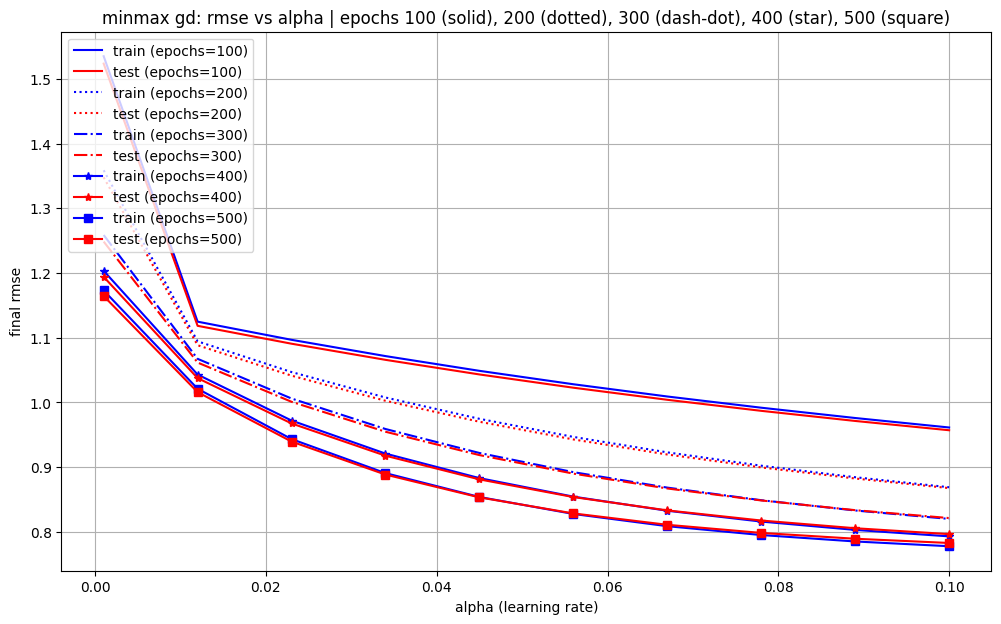

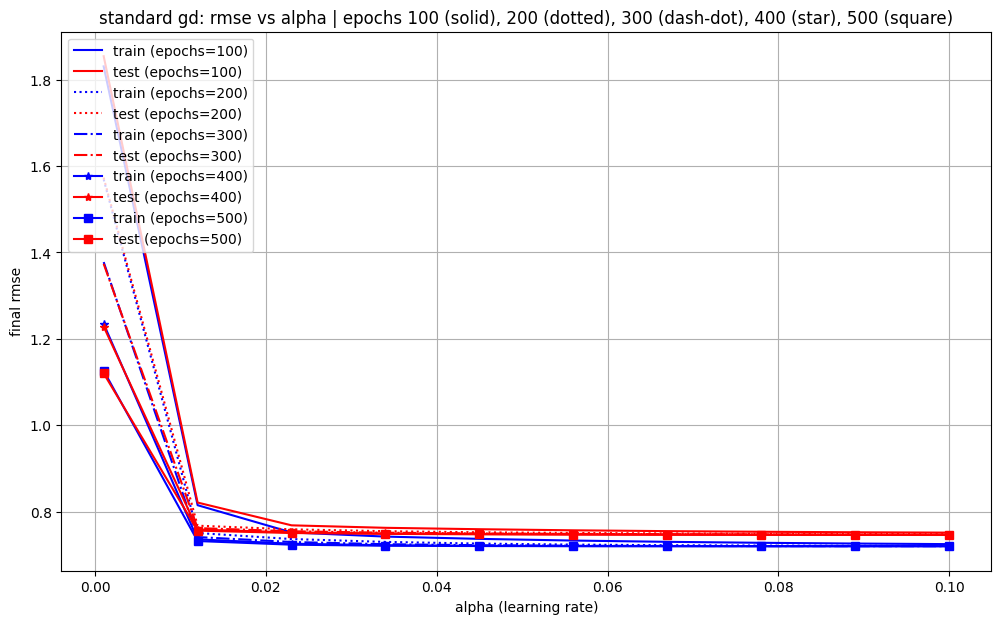

In [22]:

alphas = np.linspace(0.001, 0.1, 10)
epochs_list = [100, 200, 300, 400, 500]
styles = ['-', ':', '-.', '*', 's']


plt.figure(figsize=(12, 7))
for i, fixed_epochs in enumerate(epochs_list):
    train_rmse_vs_alpha = []
    test_rmse_vs_alpha = []
    for alpha in alphas:
        train_errors, test_errors = batch_gd(x_train_minmax, y_train, x_test_minmax, y_test, lr=alpha, epochs=fixed_epochs)
        train_rmse_vs_alpha.append(train_errors[-1])
        test_rmse_vs_alpha.append(test_errors[-1])
    plt.plot(alphas, train_rmse_vs_alpha, linestyle=styles[i] if styles[i] in ['-', ':', '-.'] else '-', marker=styles[i] if styles[i] in ['*', 's'] else None,
             color='blue', label=f'train (epochs={fixed_epochs})')
    plt.plot(alphas, test_rmse_vs_alpha, linestyle=styles[i] if styles[i] in ['-', ':', '-.'] else '-', marker=styles[i] if styles[i] in ['*', 's'] else None,
             color='red', label=f'test (epochs={fixed_epochs})')
plt.xlabel('alpha (learning rate)')
plt.ylabel('final rmse')
plt.title('minmax gd: rmse vs alpha | epochs 100 (solid), 200 (dotted), 300 (dash-dot), 400 (star), 500 (square)')
plt.grid(True)
plt.legend(loc='upper left', fontsize=10)
plt.show()

plt.figure(figsize=(12, 7))
for i, fixed_epochs in enumerate(epochs_list):
    train_rmse_vs_alpha = []
    test_rmse_vs_alpha = []
    for alpha in alphas:
        train_errors, test_errors = batch_gd(x_train_standard, y_train, x_test_standard, y_test, lr=alpha, epochs=fixed_epochs)
        train_rmse_vs_alpha.append(train_errors[-1])
        test_rmse_vs_alpha.append(test_errors[-1])
    plt.plot(alphas, train_rmse_vs_alpha, linestyle=styles[i] if styles[i] in ['-', ':', '-.'] else '-', marker=styles[i] if styles[i] in ['*', 's'] else None,
             color='blue', label=f'train (epochs={fixed_epochs})')
    plt.plot(alphas, test_rmse_vs_alpha, linestyle=styles[i] if styles[i] in ['-', ':', '-.'] else '-', marker=styles[i] if styles[i] in ['*', 's'] else None,
             color='red', label=f'test (epochs={fixed_epochs})')
plt.xlabel('alpha (learning rate)')
plt.ylabel('final rmse')
plt.title('standard gd: rmse vs alpha | epochs 100 (solid), 200 (dotted), 300 (dash-dot), 400 (star), 500 (square)')
plt.grid(True)
plt.legend(loc='upper left', fontsize=10)
plt.show()

MinMaxScaler and StandardScaler had the same test RMSE of about 0.72. The best GD results occurred with a **learning rate of 0.02** or less and **500 epochs**.

**It is worth noting that to improve the coding process, improve the quality of curve outputs, and allow quick changes to the plots for this project, the Grok AI was used to make sure the code runs as efficiently as possible. I sincerely thank you for the time spent reviewing this work.**